In [1]:
# first neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

#from sklearn.model_selection import train_test_split

In [2]:
# let's load the mnist dataset and split it into train and test

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
# confirming shape of X

X_train.shape

(60000, 28, 28)

In [4]:
# dividing X by 255 to return a value between 0 and 1, as 255 is the max rgb value of each pixel

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [5]:
# making sure images have shape (28, 28, 1)
# jon, help here. this doesn't make sense to me yet.

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [6]:
# converting y to one-hot encoding

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# confirming shapes again

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [8]:
# keras documentation network

# model = keras.Sequential([
#     keras.layers.Input(shape=(28,28,1)),
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),

#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [9]:
# # found online

# keras.backend.clear_session()

# model = keras.Sequential([
#     keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last', input_shape=(28,28,1)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
#     keras.layers.Dropout(0.25),


#     keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=1, padding='same', data_format='channels_last'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
#     keras.layers.Dropout(0.25),

#     keras.layers.Flatten(),

#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.25),

#     keras.layers.Dense(1024, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.5),
    
#     keras.layers.Dense(10, activation='softmax')
# ])

In [10]:
# inspired by vgg16

keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# # building my own AlexNet

# keras.backend.clear_session()

# model = keras.Sequential([
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.LayerNormalization(),

#     keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.LayerNormalization(),

#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.5),

#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.Dense(50, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [12]:
# let's build a convolutional neural net, as this works best with image classifiers

# model = keras.Sequential([
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Dropout(0.25),

#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                        

In [14]:


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
batch_size = 64
epochs = 20

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1
                    )

Epoch 1/20
844/844 [==============================] - 7s 8ms/step - loss: 0.3932 - accuracy: 0.8696 - val_loss: 0.0713 - val_accuracy: 0.9780
Epoch 2/20
844/844 [==============================] - 7s 8ms/step - loss: 0.1323 - accuracy: 0.9594 - val_loss: 0.0508 - val_accuracy: 0.9850
Epoch 3/20
844/844 [==============================] - 7s 9ms/step - loss: 0.1024 - accuracy: 0.9675 - val_loss: 0.0363 - val_accuracy: 0.9898
Epoch 4/20
844/844 [==============================] - 8s 9ms/step - loss: 0.0837 - accuracy: 0.9738 - val_loss: 0.0362 - val_accuracy: 0.9895
Epoch 5/20
844/844 [==============================] - 8s 10ms/step - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0320 - val_accuracy: 0.9907
Epoch 6/20
844/844 [==============================] - 9s 10ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.0268 - val_accuracy: 0.9910
Epoch 7/20
844/844 [==============================] - 9s 11ms/step - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0301 - val_accuracy: 0.9912
Epo

<Axes: xlabel='Epoch'>

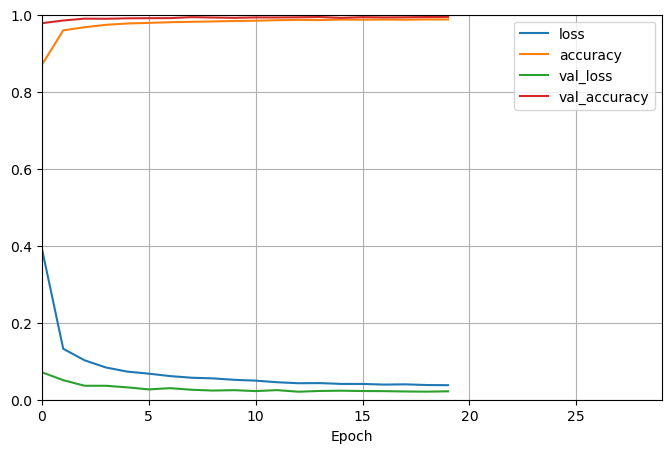

In [16]:
# graphing training

import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
)

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.01882452331483364
Test accuracy: 0.9944000244140625


In [18]:
# reults with keras documentation network: 99.2
# results with AlexNet v1 (50x50 dense): 99.0
# results with AlexNet v1 (100x100 dense): 98.9
# results with AlexNet v1 (25x25 dense): 98.6
# results with VGG16 style: 99.41 (loss 0.018311500549316406)